In [6]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from numpy.linalg import norm
from sklearn import preprocessing
import itertools
from sklearn.cluster import DBSCAN
import anndata as ad

In [38]:
adata = ad.read_h5ad("/goofys/users/Aleksandra_S/E9.5_E1S1.MOSTA.h5ad")

In [39]:
adata

AnnData object with n_obs × n_vars = 5913 × 25568
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - 2310011J03Rik', 'Regulon - 5730507C01Rik', 'Regulon - Alx1', 'Regulon - Alx3', 'Regulon - Alx4', 'Regulon - Ar', 'Regulon - Arid3a', 'Regulon - Arid3c', 'Regulon - Arnt2', 'Regulon - Arx', 'Regulon - Ascl1', 'Regulon - Atf1', 'Regulon - Atf4', 'Regulon - Atf5', 'Regulon - Atf6', 'Regulon - Atf7', 'Regulon - Bach1', 'Regulon - Bach2', 'Regulon - Barhl1', 'Regulon - Barx1', 'Regulon - Batf', 'Regulon - Bcl11a', 'Regulon - Bcl3', 'Regulon - Bcl6', 'Regulon - Bcl6b', 'Regulon - Bclaf1', 'Regulon - Bdp1', 'Regulon - Bhlha15', 'Regulon - Bhlhe22', 'Regulon - Bhlhe23', 'Regulon - Bhlhe41', 'Regulon - Bmyc', 'Regulon - Boll', 'Regulon - Bptf', 'Regulon - Brca1', 'Regulon - Brf1', 'Regulon - Brf2', 'Regulon - Bsx', 'Regulon - Cdx1', 'Regulon - Cdx2', 'Regulon - Cebpa', 'Regulon - Cebpz', 'Regulon - Chd1', 'Regulon - Clock', 'Re

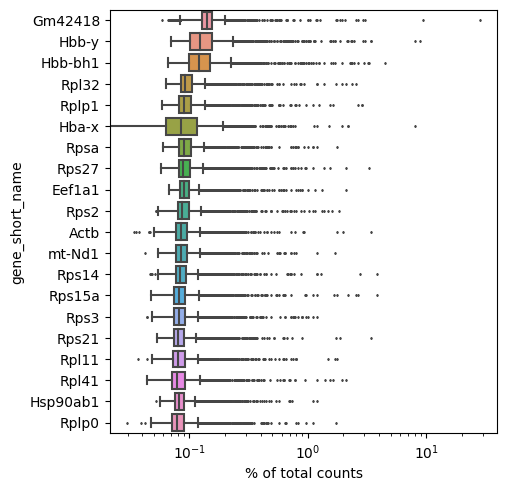

In [40]:
sc.pl.highest_expr_genes(adata, n_top=20,log=True )

## Preprocessing
calculate_qc_metrics() is already performed

### Spots
#### Total number of genes per spot

In [41]:
total_exp_per_spot = adata.obs.n_genes_by_counts
total_exp_per_spot.describe()

count    5913.000000
mean     3573.472011
std       978.244084
min         4.000000
25%      3122.000000
50%      3876.000000
75%      4270.000000
max      5236.000000
Name: n_genes_by_counts, dtype: float64

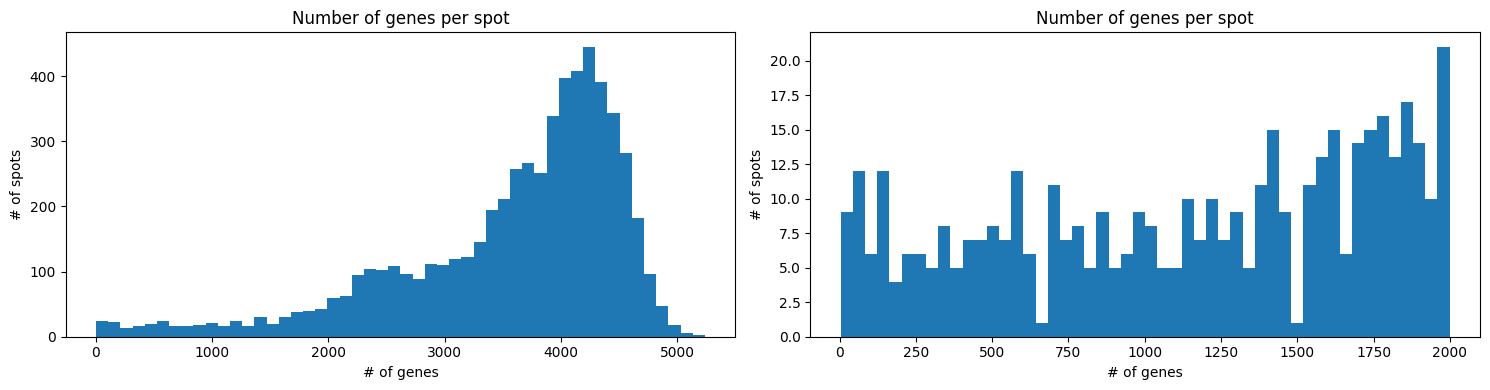

In [57]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

# Plot all the data
axs[0].hist(total_exp_per_spot, bins=50, log=False)
axs[0].set_title("Number of genes per spot")
axs[0].set_xlabel('# of genes')
axs[0].set_ylabel('# of spots')

# "Zoom in" i.e. plot only spot that meet the certain criteria (determine criteria based on the first plot)
axs[1].hist(total_exp_per_spot[total_exp_per_spot<2000], bins=50, log=False)
axs[1].set_title("Number of genes per spot")
axs[1].set_xlabel('# of genes')
axs[1].set_ylabel('# of spots')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

In [55]:
# Based on plots, we descide our treshold is 1500
sc.pp.filter_cells(adata, min_genes=1500)

In [56]:
adata

AnnData object with n_obs × n_vars = 5631 × 25568
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - 2310011J03Rik', 'Regulon - 5730507C01Rik', 'Regulon - Alx1', 'Regulon - Alx3', 'Regulon - Alx4', 'Regulon - Ar', 'Regulon - Arid3a', 'Regulon - Arid3c', 'Regulon - Arnt2', 'Regulon - Arx', 'Regulon - Ascl1', 'Regulon - Atf1', 'Regulon - Atf4', 'Regulon - Atf5', 'Regulon - Atf6', 'Regulon - Atf7', 'Regulon - Bach1', 'Regulon - Bach2', 'Regulon - Barhl1', 'Regulon - Barx1', 'Regulon - Batf', 'Regulon - Bcl11a', 'Regulon - Bcl3', 'Regulon - Bcl6', 'Regulon - Bcl6b', 'Regulon - Bclaf1', 'Regulon - Bdp1', 'Regulon - Bhlha15', 'Regulon - Bhlhe22', 'Regulon - Bhlhe23', 'Regulon - Bhlhe41', 'Regulon - Bmyc', 'Regulon - Boll', 'Regulon - Bptf', 'Regulon - Brca1', 'Regulon - Brf1', 'Regulon - Brf2', 'Regulon - Bsx', 'Regulon - Cdx1', 'Regulon - Cdx2', 'Regulon - Cebpa', 'Regulon - Cebpz', 'Regulon - Chd1', 'Regulon - Clock', 'Re

### Genes
#### Number of spots for gene

In [63]:
num_spots_per_gene = adata.var.n_cells
num_spots_per_gene.describe()

count    25568.000000
mean       826.421308
std       1259.086531
min          1.000000
25%         13.000000
50%        169.000000
75%       1184.000000
max       5907.000000
Name: n_cells_by_counts, dtype: float64

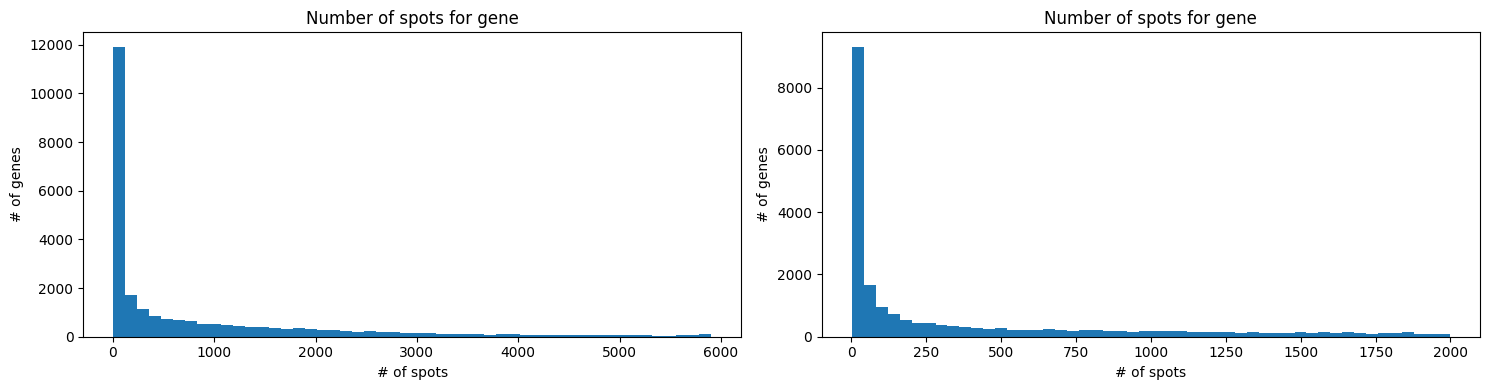

In [64]:
# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

# Plot all the data
axs[0].hist(num_spots_per_gene, bins=50, log=False)
axs[0].set_title("Number of spots for gene")
axs[0].set_xlabel('# of spots')
axs[0].set_ylabel('# of genes')

# "Zoom in" i.e. plot only spot that meet the certain criteria (determine criteria based on the first plot)
axs[1].hist(num_spots_per_gene[num_spots_per_gene<2000], bins=50, log=False)
axs[1].set_title("Number of spots for gene")
axs[1].set_xlabel('# of spots')
axs[1].set_ylabel('# of genes')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

In [1]:
sc.pp.filter_genes(adata, min_cells=10)

NameError: name 'sc' is not defined